<a href="https://colab.research.google.com/github/ramachaitanya0/Score-Predictor/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving diamonds.csv to diamonds.csv


In [6]:
import pandas as pd
import numpy as np

In [7]:
import io
di = pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))

In [8]:
di.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
Dropping unneccessary columns

In [9]:
di = di.drop("Unnamed: 0",axis =1)

Data Preprocessing

First we check for the NA or empty cells in the data frame.

In [11]:
di.isnull().sum().sum()

0

The diamonds data doesn't have null values.

In [12]:
di.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

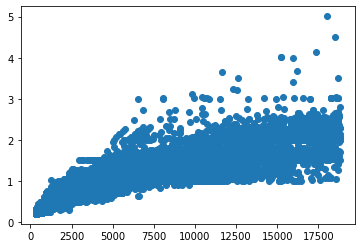

In [56]:
plt.scatter(di["price"],di["carat"])

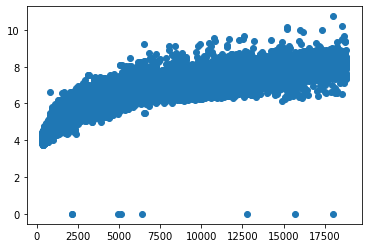

In [57]:
plt.scatter(di["price"],di["x"])

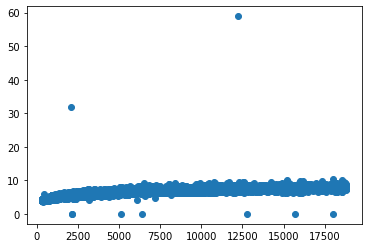

In [58]:
plt.scatter(di["price"],di["y"])

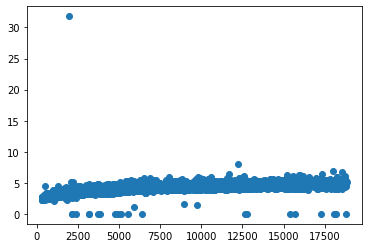

In [59]:
plt.scatter(di["price"],di["z"])

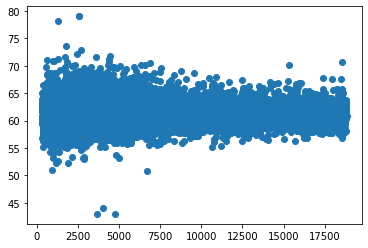

In [60]:
plt.scatter(di["price"],di["depth"])

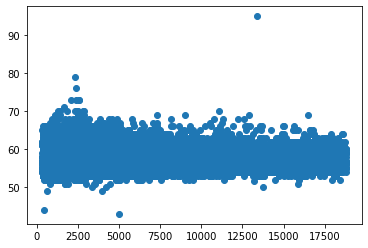

In [61]:
plt.scatter(di["price"],di["table"])

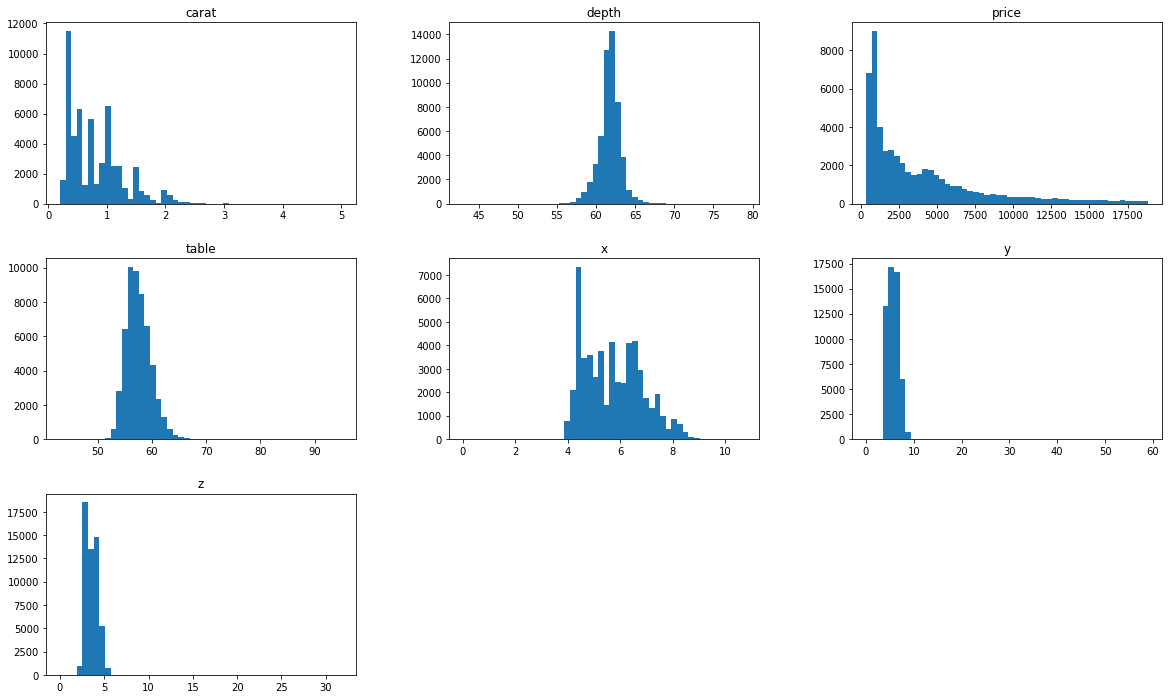

In [14]:
import matplotlib.pyplot as plt
di.hist(bins= 50,figsize = (20,12),grid = False)
plt.show()

In [15]:
cor_mat = di.corr()
cor_mat

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


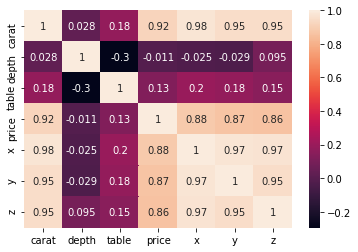

In [16]:
import seaborn as sns
sns.heatmap(cor_mat,annot = True)
plt.show()

carat variable is highly correlated to price, x, y and z.
price variable is highly correlated to carat,x, y and z.
x variable is highly correlated to carat, price,y and z.
y variable is highly correlated to carat, price x and z.
z variable is highly correlated to carat, price x and y.

Standardization of predictor  numerical variables

In [17]:
output = di["price"]
output.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [18]:
diamond_num = di[["carat","x","y","z"]]
diamond_num.head()

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75


In [19]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
diamond_scaled_num = std_scaler.fit_transform(diamond_num)


In [20]:
diamond_scaled_num

array([[-1.19816781, -1.58783745, -1.53619556, -1.57112919],
       [-1.24036129, -1.64132529, -1.65877419, -1.74117497],
       [-1.19816781, -1.49869105, -1.45739502, -1.74117497],
       ...,
       [-0.20662095, -0.06343409, -0.04774083,  0.03013526],
       [ 0.13092691,  0.37338325,  0.33750627,  0.28520393],
       [-0.10113725,  0.08811478,  0.11861587,  0.14349912]])

 Principal component analysis

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_di = pca.fit_transform(diamond_scaled_num)
pca_di_dataframe = pd.DataFrame(data = pca_di , columns =['pc1'])
pca_di_dataframe.head()

,pc1
0,-2.947162
1,-3.141041
2,-2.947673
3,-2.521280
4,-2.300183


In [22]:
pca.explained_variance_ratio_

array([0.97223214])

Pc1 explains the 97 percent of the variance of the four variables(carat, x,y,z)

ANOVA

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('price~ cut',data = di).fit()
table = sm.stats.anova_lm(lm)
print(table)

               df        sum_sq       mean_sq           F         PR(>F)
cut           4.0  1.104175e+10  2.760436e+09  175.688717  8.428307e-150
Residual  53935.0  8.474314e+11  1.571209e+07         NaN            NaN


In [24]:
lm = ols('price~ clarity',data = di).fit()
table = sm.stats.anova_lm(lm)
print(table)

               df        sum_sq       mean_sq          F         PR(>F)
clarity       7.0  2.330780e+10  3.329686e+09  215.01926  1.919090e-316
Residual  53932.0  8.351653e+11  1.548552e+07        NaN            NaN


In [25]:
lm = ols('price~ color',data = di).fit()
table = sm.stats.anova_lm(lm)
print(table)

               df        sum_sq       mean_sq           F  PR(>F)
color         6.0  2.684911e+10  4.474852e+09  290.205881     0.0
Residual  53933.0  8.316240e+11  1.541958e+07         NaN     NaN


all the p-values are less than 0.05 indicates there is a significant mean differences between these categorical variables.

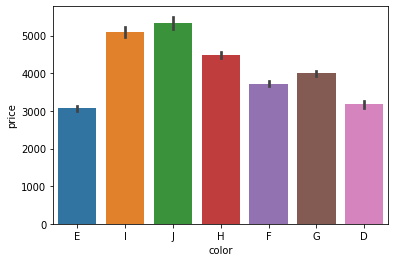

In [26]:
sns.barplot(x = "color",y = "price",data =di )

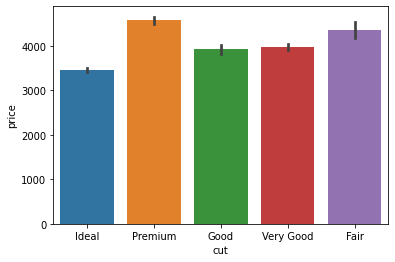

In [27]:
sns.barplot(x= "cut",y = "price",data = di)

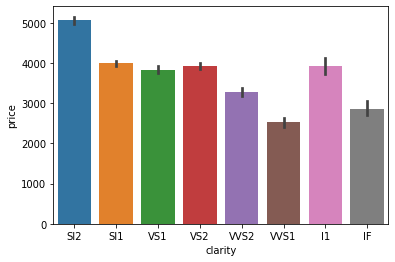

In [28]:
sns.barplot(x= "clarity",y = "price",data = di)

One hot encoding

In [29]:
di_cat = di[["cut","clarity","color"]]

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
di_cat_encode = cat_encoder.fit_transform(di_cat)
di_cat_en = di_cat_encode.toarray()
di_cat_en = pd.DataFrame(data = di_cat_en)
cat_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]

In [31]:
di_cat_en.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
di_cat_en.insert(20,"pc1",pca_di_dataframe["pc1"].values.tolist(),False)


In [33]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
diamond_sc_num = std_scale.fit_transform(di[["depth","table"]])

di_dt = pd.DataFrame(data = diamond_sc_num , columns = ["depth","table"])

In [35]:
di_cat_en.insert(21,"depth",di_dt["depth"].values.tolist(),False)
di_cat_en.insert(22,"table",di_dt["table"].values.tolist(),False)
di_cat_en.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,pc1,depth,table
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.947162,-0.174092,-1.099672
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-3.141041,-1.360738,1.585529
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.947673,-3.385019,3.375663
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.521280,0.454133,0.242928
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.300183,1.082358,0.242928


splitting the data into train and test datasets.


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(di_cat_en, output, test_size=0.33, random_state=42)


Traininig of ML models 

1. Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#Training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_hat = regressor.predict(X_test)

Evaluation linear regression model using metrics 

In [39]:
mae_lr = metrics.mean_absolute_error(y_test, y_hat)
mae_lr

1087.5963639683164

In [40]:
mse_lr =  metrics.mean_squared_error(y_test, y_hat)
mse_lr

2122995.4716637232

In [41]:
rmse_lr = np.sqrt(mse_lr)
rmse_lr

1457.0502639455246

In [42]:
r2_lr = metrics.r2_score(y_test,y_hat)
r2_lr

0.8640220145036891

2.Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor  
  
dt_regressor = DecisionTreeRegressor(random_state = 48)  
dt_regressor.fit(X_train, y_train) 
y_hat_dt = dt_regressor.predict(X_test)

Evaluation of Decision Tree regressor.

In [44]:
mae_dt = metrics.mean_absolute_error(y_test, y_hat_dt)
mae_dt

369.9573057693388

In [45]:
mse_dt =  metrics.mean_squared_error(y_test, y_hat_dt)
mse_dt

627392.1941744846

In [46]:
rmse_dt = np.sqrt(mse_dt)
rmse_dt

792.080926531175

In [47]:
r2_dt = metrics.r2_score(y_test,y_hat_dt)
r2_dt

0.9598154928643814

 Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor   
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 33) 
rf_regressor.fit(X_train, y_train) 
y_hat_rf = rf_regressor.predict(X_test)

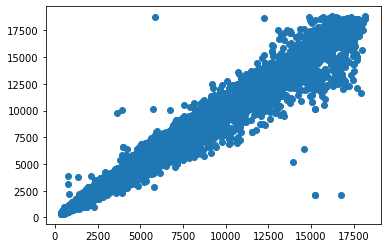

In [67]:
plt.scatter(y_hat_rf,y_test)

In [50]:
mae_rf = metrics.mean_absolute_error(y_test, y_hat_rf)
mae_rf

288.07207626912344

In [51]:

mse_rf =  metrics.mean_squared_error(y_test, y_hat_rf)
mse_rf

354103.7564121975

In [52]:
rmse_rf = np.sqrt(mse_rf)
rmse_rf

595.0661781786943

In [62]:
r2_rf= metrics.r2_score(y_test,y_hat_rf)
r2_rf

0.9773196334630553

In [ ]:
Ridge regression